# 第五章

## 一、节点的度特征

### 1. 节点的度

In [1]:
%matplotlib inline 
import networkx as nx 
G = nx.Graph() 
G.add_nodes_from(['A','B','C','D','E'])
G.add_edges_from([('A','B'),('B','C'),('B','D'),('C','D'),('C','E'),('D','E')])

print('degree of node A = ', G.degree('A')) #查看某个节点度
print('degree of ndoe A and B = ', G.degree(['A', 'B'])) #查看多个节点的度
print('inforamtion of node A = ', nx.info(G, n='A'))  #获得单个节点的度及邻域节点信息
print('degree of all nodes = ',G.degree())       #获得所有节点的度
print('the value of degree og all nodes = ',G.degree().values())    #以列表形式显示所有节点的度值

('degree of node A = ', 1)
('degree of ndoe A and B = ', {'A': 1, 'B': 3})
('inforamtion of node A = ', 'Node A has the following properties:\nDegree: 1\nNeighbors: B')
('degree of all nodes = ', {'A': 1, 'C': 3, 'B': 3, 'E': 2, 'D': 3})
('the value of degree og all nodes = ', [1, 3, 3, 2, 3])


//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### 2. 网络的平均度与密度

In [4]:
import networkx as nx
import numpy as np
G = nx.Graph() 
G.add_nodes_from(['A','B','C','D','E'])
G.add_edges_from([('A','B'),('B','C'),('B','D'),('C','D'),('C','E'),('D','E')])
#平均度

#节点平均度计算方式1：所有的连边数/所有的节点数
print ('the node number N of this network is', G.number_of_nodes())
print ('the edge number M of this network is', G.number_of_edges())
print ('the average degree of this network is', 2.0*G.number_of_edges() / G.number_of_nodes())
#节点平均度计算方式2： 所有节点的度的平均值
print ('the average degree of this network is', np.mean(G.degree().values()))
#节点的平均度计算方式3：info函数
print('information of G = ', nx.info(G))

#密度：网络实际边数/网络节点对应的最大可能边数
print ('the density of this network is', 2.0 * G.number_of_edges() / ( G.number_of_nodes() * (G.number_of_nodes() - 1)))

('the node number N of this network is', 5)
('the edge number M of this network is', 6)
('the average degree of this network is', 2.4)
('the average degree of this network is', 2.3999999999999999)
('information of G = ', 'Name: \nType: Graph\nNumber of nodes: 5\nNumber of edges: 6\nAverage degree:   2.4000')
('the density of this network is', 0.6)


### 3. 节点的度分布

Distribution of degree =  [1, 1, 19, 75, 205, 376, 666, 862, 1162, 1250, 1246, 1147, 930, 728, 524, 340, 201, 130, 66, 28, 25, 9, 2, 4, 0, 2, 1]


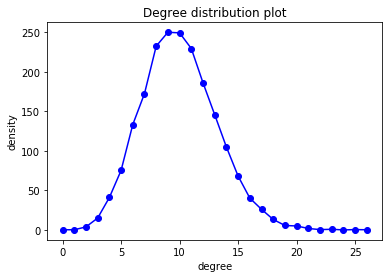

In [31]:
import networkx as nx
from statistics import mean
import matplotlib.pyplot as plt
G = nx.random_graphs.erdos_renyi_graph(10000, 0.001)#构建ER网络

#查看网络中节点所有度值出现的频率，即节点度分布
degree_hist = nx.degree_histogram(G)
print('Distribution of degree = ',degree_hist)

#将频次转换为概率
degree_distribution = [ degree_i / float(sum(degree)) for degree_i in degree_hist]
degree_index = range(len(degree_hist))
plt.plot(degree_index, degree_distribution,'b-', marker='o')
plt.title('Degree distribution plot')
plt.ylabel('density')
plt.xlabel('degree')
plt.show()

## 二、匹配特性

### 1. 匹配系数

In [33]:
#生成自定义网络G
G = nx.Graph()              
G.add_nodes_from(['CK','YC','ZXX','GDG',
                  'ZW','LXR','LKF','LZY']) 
G.add_edges_from([('LKF','ZW'),('ZW','YC'),
                  ('ZW','CK'),('ZW','ZXX'),
                  ('CK','YC'),('CK','LXR'),
                  ('LXR','YC'),('LXR','ZXX'),
                  ('LXR','LZY'),('LXR','GDG'),
                  ('LZY','GDG'),('ZW','LXR')])

#计算网络的匹配系数
r_G=nx.degree_assortativity_coefficient(G)
print ('degree_assortativity_coefficient of G = ',r_G)

degree_assortativity_coefficient of G =  -0.485148514851


### 2. 邻居节点的平均度

In [42]:
import networkx as nx
from statistics import  mean
G = nx.Graph()             
G.add_nodes_from([1,2,3,4,5,6])                               
G.add_edges_from([(1,2),(1,3),(1,4),(1,5),(1,6),(2,3),(3,4),(4,5)]) 
#邻居节点的平均度
neigh_avrdegree = mean([ len(G.neighbors(node)) for node in G.nodes()])
print('average degree of neighbos node = ', neigh_avrdegree)

average degree of neighbos node =  2.6666666666666665


## 三、聚类系数

### 1. 全局聚类系数

In [43]:
import networkx as nx
G = nx.Graph()             
G.add_nodes_from([1,2,3,4,5,6])                               
G.add_edges_from([(1,2),(1,3),(1,4),(1,5),(1,6),(2,3),(3,4),(4,5)]) 

#计算网络平均聚类系数
Average_C = nx.average_clustering(G)
print('average_clustering = ', Average_C)

average_clustering =  0.6055555555555555


### 2. 局域聚类系数

In [45]:
#计算网络中每个节点的聚类系数
C_all  =nx.clustering(G)
print ('clustering of each node = ',C_all)

clustering of each node =  {1: 0.3, 2: 1.0, 3: 0.6666666666666666, 4: 0.6666666666666666, 5: 1.0, 6: 0.0}


## 四、平均最短路径

In [46]:
import networkx as nx
G = nx.Graph()             
G.add_nodes_from([1,2,3,4,5,6])                               
G.add_edges_from([(1,2),(1,3),(1,4),(1,5),(1,6),(2,3),(3,4),(4,5)]) 

# 获取网络中所有最短路径的平均值，即网络的平均最短路径长度
Average_path_length = nx.average_shortest_path_length(G)
print ('Average_path_length = ', Average_path_length)

Average_path_length =  1.4666666666666666


## 五、 小世界网络特征

C:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


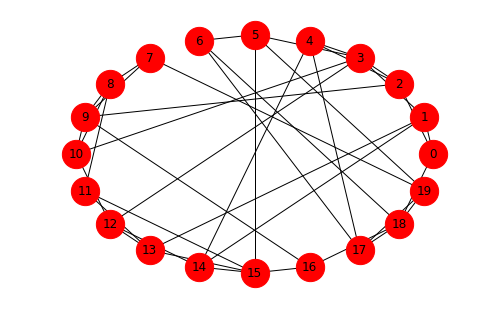

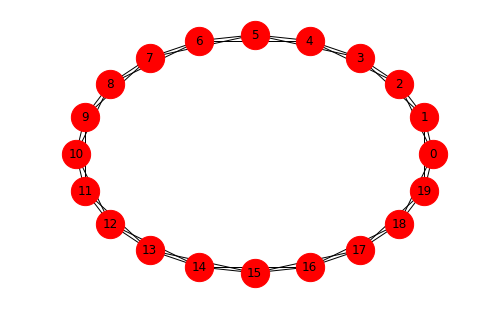

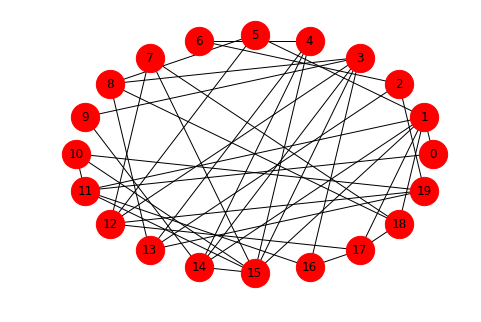

In [48]:
#小世界网络的生成
WS = nx.random_graphs.watts_strogatz_graph(20,4,0.3)        #生成包含20个节点、每个节点4个近邻、随机化重连概率为0.3的小世界网络 
pos = nx.circular_layout(WS)                                #定义一个布局，此处采用了circular布局方式
nx.draw(WS,pos, with_labels=True, node_size =800)           #绘制WS小世界网络的图形
plt.show()

#p=0时，生成规则网络
WS = nx.random_graphs.watts_strogatz_graph(20,4,0)       
nx.draw(WS,pos, with_labels=True, node_size =800)          
plt.show()

#p=1时，生成ER随机网络
WS = nx.random_graphs.watts_strogatz_graph(20,4,1.0)          
nx.draw(WS,pos, with_labels=True, node_size =800)   
plt.show()

## 富人俱乐部特性

In [51]:
import networkx as nx
G = nx.random_graphs.erdos_renyi_graph(10000, 0.001)#构建ER网络

rc = nx.rich_club_coefficient(WS, normalized=True)
print('rich_club_coefficient = ', rc)

rich_club_coefficient =  {0: 1.0, 1: 1.0, 2: 1.0, 3: 0.9523809523809524, 4: 1.3333333333333333, 5: 1.0, 6: 1.0}
